<a href="https://colab.research.google.com/github/data2450/flower-classification/blob/main/Image_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install streamlit
!pip -q install pyngrok

     |████████████████████████████████| 7.4MB 5.2MB/s 
     |████████████████████████████████| 102kB 11.3MB/s 
     |████████████████████████████████| 6.9MB 49.2MB/s 
     |████████████████████████████████| 112kB 50.6MB/s 
     |████████████████████████████████| 163kB 48.9MB/s 
     |████████████████████████████████| 4.5MB 48.4MB/s 
     |████████████████████████████████| 133kB 50.3MB/s 
     |████████████████████████████████| 143kB 48.5MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 122kB 49.7MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.3.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 8s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


The flowers dataset contains 5 sub-directories, one per class:

flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

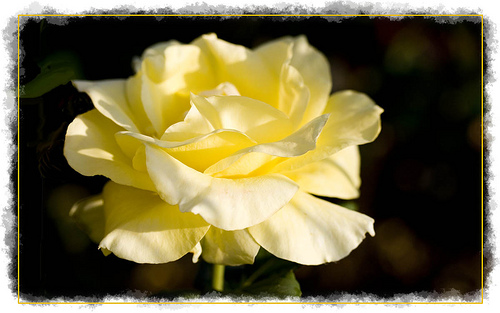

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[3]))

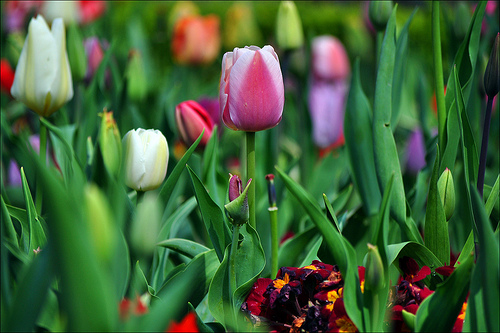

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

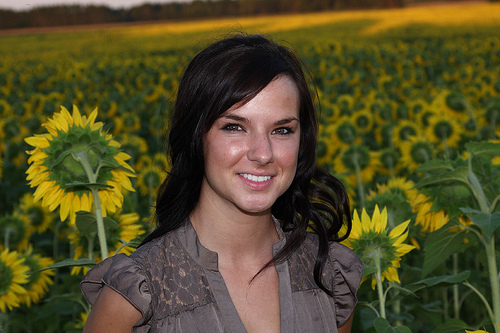

In [ ]:
sun = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sun[3]))

# Load using keras.preprocessing



In [ ]:
batch_size = 32
img_height = 180
img_width = 180
#in each iteration we are considering 32 images for processing ,it will take 115 iteration to complete one epoch

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
#we are using 2936 images for training 

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


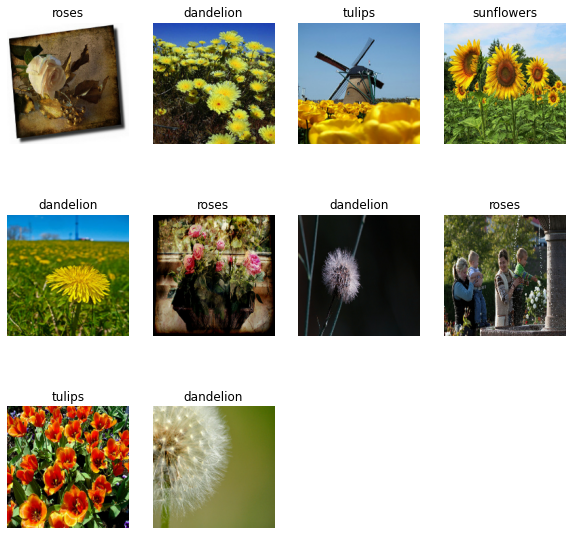

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(10):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

You can call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.

# Create the model
The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 128 units on top of it that is activated by a relu activation function. This model has not been tuned for high accuracy.

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) 

Epoch 1/10
92/92 [==============================] - 93s 1s/step - loss: 1.5922 - accuracy: 0.3031 - val_loss: 1.5101 - val_accuracy: 0.3787
Epoch 2/10
92/92 [==============================] - 93s 1s/step - loss: 1.4801 - accuracy: 0.4114 - val_loss: 1.4114 - val_accuracy: 0.4809
Epoch 3/10
92/92 [==============================] - 93s 1s/step - loss: 1.4113 - accuracy: 0.4860 - val_loss: 1.3604 - val_accuracy: 0.5354
Epoch 4/10
92/92 [==============================] - 97s 1s/step - loss: 1.3134 - accuracy: 0.5851 - val_loss: 1.3267 - val_accuracy: 0.5681
Epoch 5/10
92/92 [==============================] - 93s 1s/step - loss: 1.2876 - accuracy: 0.6148 - val_loss: 1.3106 - val_accuracy: 0.5790
Epoch 6/10
92/92 [==============================] - 92s 1s/step - loss: 1.2461 - accuracy: 0.6550 - val_loss: 1.2795 - val_accuracy: 0.6226
Epoch 7/10
92/92 [==============================] - 92s 1000ms/step - loss: 1.2115 - accuracy: 0.6904 - val_loss: 1.2706 - val_accuracy: 0.6144
Epoch 8/10
92/92

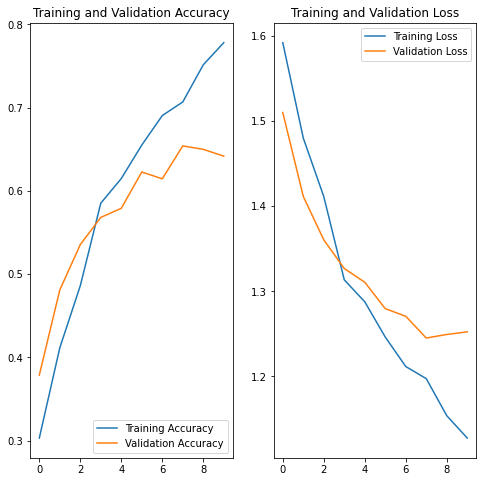

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
tf.keras.models.save_model(model,'flowermodel.hdf5')

In [ ]:
#!pip install -q streamlit

In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
import numpy as np
st.set_option("deprecation.showfileUploaderEncoding",False)
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/flowermodel.hdf5')
  return model
model=load_model()
st.write("""
            # flower classification
            """        ) 
file=st.file_uploader('please upload a image of type',type=['jpg','png'])
import cv2
from PIL import Image , ImageOps
def import_predict(image_data,model):

   size=(180,180)
   image=ImageOps.fit(image_data,size,Image.ANTIALIAS)
   img=np.asarray(image)
   image_reshape=img[np.newaxis,...]
   prediction=model.predict(image_reshape)


   return prediction

if file is None:
  st.text('please upload an image file')   
else:
  image=Image.open(file)
  st.image(image,use_column_width=True)  
  prediction=import_predict(image,model)
  class_names= ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
  strings='this image is most likely as :'+class_names[np.argmax(prediction)]
  st.success(strings)



Overwriting app.py


In [ ]:
from pyngrok import ngrok
public_url=ngrok.connect(port=80)
print(public_url)
!streamlit run --server.port 80 app.py >/dev/null

NgrokTunnel: "http://99631514ab25.ngrok.io" -> "http://localhost:80"
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2020-11-30 05:37:26.546390: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-30 05:37:27.852087: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-30 05:37:27.860616: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-11-30 05:37:27.860676: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (58468355037e): /proc/driver/nvidia/version does not exist
2020-11-30 05:37:27.867248: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] C

In [ ]:
#!pip install pyngrok

In [ ]:
#!ngrok authtoken 1jhCVSbRDPUWEVOxir1re4M7yfw_2EEwVrJW6hszzRdhhpmjf

In [ ]:
#!pip install pyngrok

In [ ]:
#!nohup streamlit run app.py &

In [ ]:
#from pyngrok import ngrok
#url=ngrok.connect(port=8050)
#url

In [ ]:
#ngrok.kill()